# Feature Engineering Notebook

## Objectives

*   Engineer features for Classification, Regression and Cluster models


## Inputs

* inputs/datasets/cleaned/TrainSet.csv
* inputs/datasets/cleaned/TestSet.csv

## Outputs

* generate a list with variables to engineer

## Conclusions



* Feature Engineering Transformers
  * Ordinal categorical encoding: `['Country']`
  * Smart Correlation Selection: `['Coal', 'Gas', 'Oil']`
  


---

# Change working directory

We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [1]:
import os
current_dir = os.getcwd()
current_dir

'c:\\Users\\Grampers\\Desktop\\CO2Oracle\\jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [2]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [3]:
current_dir = os.getcwd()
current_dir

'c:\\Users\\Grampers\\Desktop\\CO2Oracle'

---

# Load Cleaned Data

Train Set

In [4]:
import pandas as pd
train_set_path = "outputs/datasets/cleaned/TrainSetCleaned.csv"
TrainSet = pd.read_csv(train_set_path)
TrainSet.head(100)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Country_Original
0,98,1892,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Ireland
1,108,1851,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Kuwait
2,118,1786,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Liechtenstein
3,73,1984,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,0.000000,French West Africa
4,197,1963,2.531527,0.388384,2.106800,0.000000,0.036343,0.000000,1.255329,0.240696,Sri Lanka
...,...,...,...,...,...,...,...,...,...,...,...
95,58,1758,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Dominican Republic
96,74,2004,4.657891,0.000000,1.211833,0.267262,0.103450,3.075346,1.255329,3.286895,Gabon
97,198,2019,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,0.000000,St. Kitts-Nevis-Anguilla
98,1,1826,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Albania


Test Set

In [5]:
test_set_path = 'outputs/datasets/cleaned/TestSetCleaned.csv'
TestSet = pd.read_csv(test_set_path)
TestSet.head(3)

,Country,Year,Total,Coal,Oil,Gas,Cement,Flaring,Other,Per Capita,Country_Original
0,141,2005,11.521173,0.586426,5.252179,5.457428,0.214145,0.010995,1.255329,0.241410,Myanmar
1,135,2000,3.572952,0.366400,1.282400,1.751392,0.172760,0.000000,1.255329,0.840384,Moldova
2,211,1771,0.000000,0.271852,1.044240,0.000000,0.022756,0.000000,1.255329,1.303950,Tonga


# Data Exploration

In feature engineering, you are interested to evaluate which potential transformation you could do in your variables
* Take your notes in your separate spreadsheet

Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50483 entries, 0 to 50482
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           50483 non-null  int64  
 1   Year              50483 non-null  int64  
 2   Total             50483 non-null  float64
 3   Coal              50483 non-null  float64
 4   Oil               50483 non-null  float64
 5   Gas               50483 non-null  float64
 6   Cement            50483 non-null  float64
 7   Flaring           50483 non-null  float64
 8   Other             50483 non-null  float64
 9   Per Capita        50483 non-null  float64
 10  Country_Original  50483 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 4.2+ MB
None

Descriptive Statistics:
            Country          Year         Total          Coal           Oil  \
count  50483.000000  50483.000000  50483.000000  50483.000000  50483.000000   
mean     11

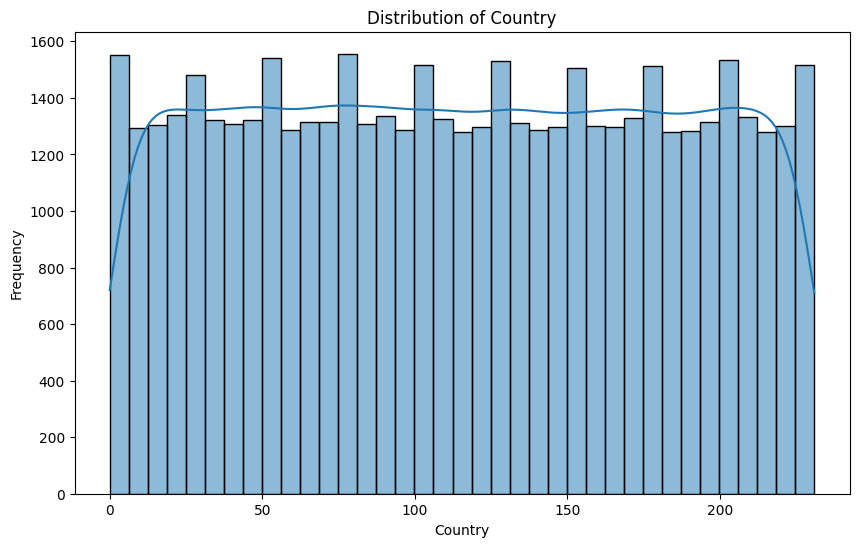

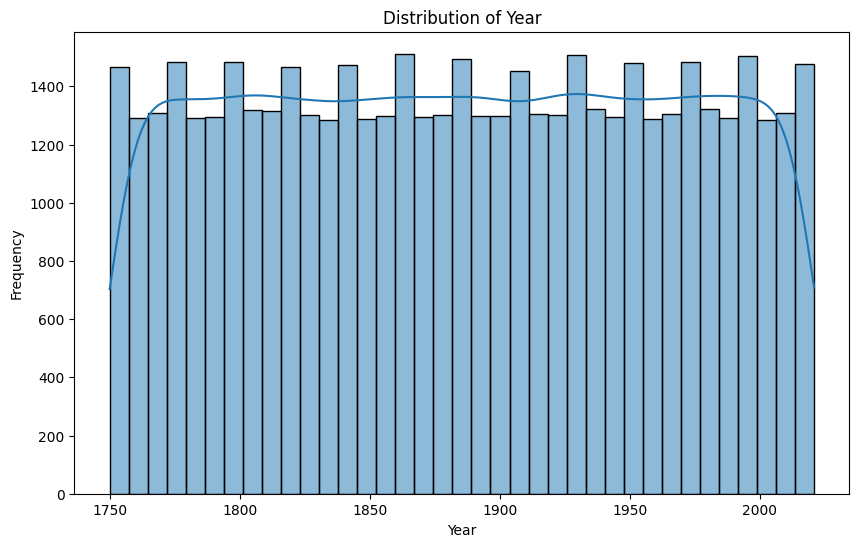

KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001FBE095B560> (for post_execute), with arguments args (),kwargs {}:


KeyboardInterrupt: 

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Display basic information
print("Basic Information:")
print(TrainSet.info())

# Display descriptive statistics
print("\nDescriptive Statistics:")
print(TrainSet.describe())

# Identify columns with missing data
vars_with_missing_data = TrainSet.columns[TrainSet.isnull().any()].tolist()

if vars_with_missing_data:
    print(f"\nVariables with Missing Data: {vars_with_missing_data}")
    missing_summary = TrainSet[vars_with_missing_data].isnull().sum()
    print("Missing Data Summary:\n", missing_summary)
    
    # Visualize missing data
    plt.figure(figsize=(12, 8))
    sns.heatmap(TrainSet[vars_with_missing_data].isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Data Heatmap')
    plt.show()
else:
    print("There are no variables with missing data")

# Display histograms for numerical features
numerical_cols = TrainSet.select_dtypes(include=['int64', 'float64']).columns

for col in numerical_cols:
    plt.figure(figsize=(10, 6))
    sns.histplot(TrainSet[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()




# Correlation and PPS Analysis

* I Don't expect major changes compared to the data cleaning notebook so correlation levels and PPS will essentially be the same.

# Feature Engineering

## Custom function

We studied this custom function in the feature-engine lesson. That will help you with the feature engineering process.
* Do not worry if you need help understanding the full code at first, as it is expected you will take some time to absorb the use case.
* At this moment, what matters is to understand the function objective and how you can use it.

In [6]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import warnings
from feature_engine import transformation as vt
from feature_engine.outliers import Winsorizer
from feature_engine.encoding import OrdinalEncoder

sns.set(style="whitegrid")
warnings.filterwarnings('ignore')


def FeatureEngineeringAnalysis(df, analysis_type=None):
    """
    - Used for quick feature engineering on numerical and categorical variables
    to decide which transformation can better transform the distribution shape
    - Once transformed, use a reporting tool, like ydata-profiling, to evaluate distributions
    """
    check_missing_values(df)
    allowed_types = ['numerical', 'ordinal_encoder', 'outlier_winsorizer', 'custom']
    check_user_entry_on_analysis_type(analysis_type, allowed_types)
    
    if analysis_type == 'custom':
        df = apply_custom_feature_engineering(df)
        return df

    list_column_transformers = define_list_column_transformers(analysis_type)

    # Loop in each variable and engineer the data according to the analysis type
    df_feat_eng = pd.DataFrame([])
    for column in df.columns:
        # create additional columns (column_method) to apply the methods
        df_feat_eng = pd.concat([df_feat_eng, df[column]], axis=1)
        for method in list_column_transformers:
            df_feat_eng[f"{column}_{method}"] = df[column]

        # Apply transformers in respective column_transformers
        df_feat_eng, list_applied_transformers = apply_transformers(
            analysis_type, df_feat_eng, column)

        # For each variable, assess how the transformations perform
        transformer_evaluation(
            column, list_applied_transformers, analysis_type, df_feat_eng)

    return df_feat_eng


def apply_custom_feature_engineering(df):
    # Custom feature engineering
    df['Total_Lag1'] = df.groupby('Country')['Total'].shift(1)
    df['Total_Lag2'] = df.groupby('Country')['Total'].shift(2)
    df['Total_Lag3'] = df.groupby('Country')['Total'].shift(3)
    df['Total_Rolling_Mean'] = df.groupby('Country')['Total'].rolling(window=3).mean().reset_index(level=0, drop=True)
    df['Total_Rolling_Std'] = df.groupby('Country')['Total'].rolling(window=3).std().reset_index(level=0, drop=True)
    df['Cumulative_Total'] = df.groupby('Country')['Total'].cumsum()
    df['Coal_Gas_Interaction'] = df['Coal'] * df['Gas']
    df['Oil_Flaring_Interaction'] = df['Oil'] * df['Flaring']
    df['Year_on_Year_Change'] = df.groupby('Country')['Total'].pct_change(periods=12)
    df['Coal_Percentage'] = df['Coal'] / df['Total']
    df['Gas_Percentage'] = df['Gas'] / df['Total']
    df['Oil_Percentage'] = df['Oil'] / df['Total']
    df['Flaring_Percentage'] = df['Flaring'] / df['Total']
    return df


def check_user_entry_on_analysis_type(analysis_type, allowed_types):
    """ Check analysis type """
    if analysis_type is None:
        raise SystemExit(
            f"You should pass analysis_type parameter as one of the following options: {allowed_types}")
    if analysis_type not in allowed_types:
        raise SystemExit(
            f"analysis_type argument should be one of these options: {allowed_types}")


def check_missing_values(df):
    if df.isna().sum().sum() != 0:
        raise SystemExit(
            f"There is a missing value in your dataset. Please handle that before getting into feature engineering.")


def define_list_column_transformers(analysis_type):
    """ Set suffix columns according to analysis_type"""
    if analysis_type == 'numerical':
        list_column_transformers = [
            "log_e", "log_10", "reciprocal", "power", "box_cox", "yeo_johnson"]

    elif analysis_type == 'ordinal_encoder':
        list_column_transformers = ["ordinal_encoder"]

    elif analysis_type == 'outlier_winsorizer':
        list_column_transformers = ['iqr']

    return list_column_transformers


def apply_transformers(analysis_type, df_feat_eng, column):
    for col in df_feat_eng.select_dtypes(include='category').columns:
        df_feat_eng[col] = df_feat_eng[col].astype('object')

    if analysis_type == 'numerical':
        df_feat_eng, list_applied_transformers = FeatEngineering_Numerical(
            df_feat_eng, column)

    elif analysis_type == 'outlier_winsorizer':
        df_feat_eng, list_applied_transformers = FeatEngineering_OutlierWinsorizer(
            df_feat_eng, column)

    elif analysis_type == 'ordinal_encoder':
        df_feat_eng, list_applied_transformers = FeatEngineering_CategoricalEncoder(
            df_feat_eng, column)

    return df_feat_eng, list_applied_transformers


def transformer_evaluation(column, list_applied_transformers, analysis_type, df_feat_eng):
    # For each variable, assess how the transformations perform
    print(f"* Variable Analyzed: {column}")
    print(f"* Applied transformation: {list_applied_transformers} \n")
    for col in [column] + list_applied_transformers:

        if analysis_type != 'ordinal_encoder':
            DiagnosticPlots_Numerical(df_feat_eng, col)

        else:
            if col == column:
                DiagnosticPlots_Categories(df_feat_eng, col)
            else:
                DiagnosticPlots_Numerical(df_feat_eng, col)

        print("\n")


def DiagnosticPlots_Categories(df_feat_eng, col):
    plt.figure(figsize=(4, 3))
    sns.countplot(data=df_feat_eng, x=col, palette=[
                  '#432371'], order=df_feat_eng[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.suptitle(f"{col}", fontsize=30, y=1.05)
    plt.show()
    print("\n")


def DiagnosticPlots_Numerical(df, variable):
    fig, axes = plt.subplots(1, 3, figsize=(12, 4))
    sns.histplot(data=df, x=variable, kde=True, element="step", ax=axes[0])
    stats.probplot(df[variable], dist="norm", plot=axes[1])
    sns.boxplot(x=df[variable], ax=axes[2])

    axes[0].set_title('Histogram')
    axes[1].set_title('QQ Plot')
    axes[2].set_title('Boxplot')
    fig.suptitle(f"{variable}", fontsize=30, y=1.05)
    plt.tight_layout()
    plt.show()


def FeatEngineering_CategoricalEncoder(df_feat_eng, column):
    list_methods_worked = []
    try:
        encoder = OrdinalEncoder(encoding_method='arbitrary', variables=[
                                 f"{column}_ordinal_encoder"])
        df_feat_eng = encoder.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_ordinal_encoder")

    except Exception:
        df_feat_eng.drop([f"{column}_ordinal_encoder"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_OutlierWinsorizer(df_feat_eng, column):
    list_methods_worked = []

    # Winsorizer iqr
    try:
        disc = Winsorizer(
            capping_method='iqr', tail='both', fold=1.5, variables=[f"{column}_iqr"])
        df_feat_eng = disc.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_iqr")
    except Exception:
        df_feat_eng.drop([f"{column}_iqr"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked


def FeatEngineering_Numerical(df_feat_eng, column):
    list_methods_worked = []

    # LogTransformer base e
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_e"])
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_e")
    except Exception:
        df_feat_eng.drop([f"{column}_log_e"], axis=1, inplace=True)

    # LogTransformer base 10
    try:
        lt = vt.LogTransformer(variables=[f"{column}_log_10"], base='10')
        df_feat_eng = lt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_log_10")
    except Exception:
        df_feat_eng.drop([f"{column}_log_10"], axis=1, inplace=True)

    # ReciprocalTransformer
    try:
        rt = vt.ReciprocalTransformer(variables=[f"{column}_reciprocal"])
        df_feat_eng = rt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_reciprocal")
    except Exception:
        df_feat_eng.drop([f"{column}_reciprocal"], axis=1, inplace=True)

    # PowerTransformer
    try:
        pt = vt.PowerTransformer(variables=[f"{column}_power"])
        df_feat_eng = pt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_power")
    except Exception:
        df_feat_eng.drop([f"{column}_power"], axis=1, inplace=True)

    # BoxCoxTransformer
    try:
        bct = vt.BoxCoxTransformer(variables=[f"{column}_box_cox"])
        df_feat_eng = bct.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_box_cox")
    except Exception:
        df_feat_eng.drop([f"{column}_box_cox"], axis=1, inplace=True)

    # YeoJohnsonTransformer
    try:
        yjt = vt.YeoJohnsonTransformer(variables=[f"{column}_yeo_johnson"])
        df_feat_eng = yjt.fit_transform(df_feat_eng)
        list_methods_worked.append(f"{column}_yeo_johnson")
    except Exception:
        df_feat_eng.drop([f"{column}_yeo_johnson"], axis=1, inplace=True)

    return df_feat_eng, list_methods_worked



## Feature Engineering Spreadsheet Summary

* Consider the notes taken in your spreadsheet summary. List the transformers you will use
    * Categorical Encoding
    * Numerical Transformation
    * Smart Correlation Selection

## Dealing with Feature Engineering

### Categorical Encoding - Ordinal: replaces categories with ordinal numbers 

* Step 1: Select variable(s)

In [7]:
variables_engineering= ['Country']

variables_engineering

['Country']

* Step 2: Create a separate DataFrame, with your variable(s)

In [8]:
df_engineering = TrainSet[variables_engineering].copy()
df_engineering.head(3)

,Country
0,98
1,108
2,118


* Step 3: Create engineered variables(s) by applying the transformation(s), assess engineered variables distribution and select the most suitable method for each variable.

* Variable Analyzed: Country
* Applied transformation: [] 



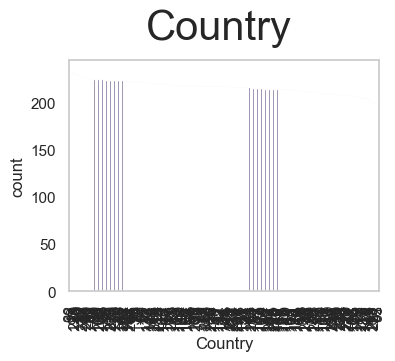





Ordinal encoding applied successfully.
Transformed Training Set:
   Country  Year     Total      Coal      Oil  Gas    Cement  Flaring  \
0       98  1892  0.000000  0.271852  1.04424  0.0  0.022756      0.0   
1      108  1851  0.000000  0.271852  1.04424  0.0  0.022756      0.0   
2      118  1786  0.000000  0.271852  1.04424  0.0  0.022756      0.0   
3       73  1984  0.000000  0.271852  1.04424  0.0  0.022756      0.0   
4      197  1963  2.531527  0.388384  2.10680  0.0  0.036343      0.0   

      Other  Per Capita    Country_Original  
0  1.255329    1.303950             Ireland  
1  1.255329    1.303950              Kuwait  
2  1.255329    1.303950       Liechtenstein  
3  1.255329    0.000000  French West Africa  
4  1.255329    0.240696           Sri Lanka  

Transformed Test Set:
   Country  Year      Total       Coal       Oil       Gas    Cement  \
0      141  2005  11.521173   0.586426  5.252179  5.457428  0.214145   
1      135  2000   3.572952   0.366400  1.282400 

In [9]:
df_engineering = FeatureEngineeringAnalysis(df=df_engineering, analysis_type='ordinal_encoder')

# Confirm the transformation
print("Ordinal encoding applied successfully.")
print("Transformed Training Set:")
print(TrainSet.head())
print("\nTransformed Test Set:")
print(TestSet.head())

* For each variable, write your conclusion on how the transformation(s) look(s) to be effective.
  * For all variables, the transformation is effective, since it converted categories to numbers.



* Step 4 - Apply the selected transformation to the Train and Test set

In [10]:
# the steps are: 
# 1 - create a transformer
# 2 - fit_transform into TrainSet
# 3 - transform into TestSet
# Convert these variables to object type
TrainSet[variables_engineering] = TrainSet[variables_engineering].astype('object')
TestSet[variables_engineering] = TestSet[variables_engineering].astype('object')
encoder = OrdinalEncoder(encoding_method='arbitrary', variables = variables_engineering)
TrainSet = encoder.fit_transform(TrainSet)
TestSet = encoder.transform(TestSet)

print("* Categorical encoding - ordinal transformation done!")

* Categorical encoding - ordinal transformation done!


### SmartCorrelatedSelection Variables

* Step 1: Select variable(s)

In [13]:
# I don't need to select variables, since I need all variables for this transformer

* Step 2: Create a separate DataFrame, with my variable(s)

In [11]:
df_engineering = TrainSet.copy()
df_engineering.head(3)
df_engineering.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50483 entries, 0 to 50482
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country           50483 non-null  int64  
 1   Year              50483 non-null  int64  
 2   Total             50483 non-null  float64
 3   Coal              50483 non-null  float64
 4   Oil               50483 non-null  float64
 5   Gas               50483 non-null  float64
 6   Cement            50483 non-null  float64
 7   Flaring           50483 non-null  float64
 8   Other             50483 non-null  float64
 9   Per Capita        50483 non-null  float64
 10  Country_Original  50483 non-null  object 
dtypes: float64(8), int64(2), object(1)
memory usage: 4.2+ MB


* Step 3: Create engineered variables(s) applying the transformation(s)

In [12]:
from feature_engine.selection import SmartCorrelatedSelection
corr_sel = SmartCorrelatedSelection(variables=None, method="spearman", threshold=0.7, selection_method="variance")

corr_sel.fit_transform(df_engineering)
corr_sel.correlated_feature_sets_

[]

In [13]:
transformed_df = corr_sel.fit_transform(df_engineering)
print(transformed_df.shape)  # Check the number of features remaining


(50483, 11)


In [14]:
print(transformed_df.columns)


Index(['Country', 'Year', 'Total', 'Coal', 'Oil', 'Gas', 'Cement', 'Flaring',
       'Other', 'Per Capita', 'Country_Original'],
      dtype='object')


In [15]:
corr_sel.features_to_drop_

[]

In [16]:
corr_sel.correlated_feature_sets_


[]

---

# So what is the conclusion? :)


The list below shows the transformations needed for feature engineering.
  * You will add these steps to the ML Pipeline


Feature Engineering Transformers
  * Ordinal categorical encoding: `['Country']`
  * Smart Correlation Selection: `['Coal', 'Gas', 'Oil']`
  

* Well done! Clear the outputs, and move on to the following notebook.